**Machine Learning Project: Student Performance Predictor**
***(Part 1. Linear Regression)***

### Step 1: Import Libraries
Here, we import several libraries that will be used throughout the project. These libraries help with data manipulation (pandas), machine learning (sklearn), and visualization (matplotlib).


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

### Step 2: Load the Dataset
In this step, we load the dataset `student-mat.csv` into a pandas DataFrame. This file contains the student performance data that we will use to predict final grades. Using the `read_csv()` function, we read the data from the CSV file into the DataFrame `data`.

We then use `data.head()` to display the first 5 rows of the dataset, which helps us get a glimpse of the structure and contents of the data.


In [7]:
# The dataset uses semicolons (;) as the delimiter instead of commas (,).
# By default, pandas reads CSV files using commas as the separator.
# To fix this, we need to specify the delimiter as a semicolon when reading the file.

# Load the dataset with semicolon delimiter
data = pd.read_csv("student-mat.csv", delimiter=";")

# Display the first 5 rows to inspect the dataset and ensure it has been read correctly
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Step 3: Prepare the Data
This part of the code first select the valuable data from the data set(you can always play around with it) and put them into a data frame named “data”, then split the data frame into two different arrays(X and y) where X has all the data except the data under the attribute “G3” since that’s what this model is going to predict and y only has “G3” data. In data science, X is called the features(input) and y is called the labels(output). The last line of the code splits the data into training and testing data. The test_size is set to 0.1 so that 90% of the data is used for training and 10% of the data is used for testing.



In [10]:
# Select the relevant columns for the dataset
data = data[["G1", "G2", "G3", "famrel", "traveltime", "studytime", "freetime", "absences", "age", "Medu", "Fedu", "failures", "goout", "Dalc", "Walc"]]

# Set the column to predict
predict = "G3"

# Drop the target column from the feature set
X = np.array(data.drop([predict], axis=1))  # axis=1 to drop columns, not rows
y = np.array(data[predict])  # Target variable is 'G3'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)


### Step 4: Implement the Algorithm
The first two lines of code here define the linear regression model named “linear” and fit the training data into the model. The next two lines of code measure the accuracy of the model by putting the testing set into the model and then print out the accuracy.

In [11]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
acc = linear.score(X_test, y_test)
print(acc)

0.8079496280368934


### Step 5: Predictions on All Students
A for-loop is implemented here to print out the prediction for all students for visualization purposes.


In [12]:
predictions = linear.predict(X_test)
for x in range(len(predictions)):
    print(predictions[x], X_test[x], y_test[x])

18.26834449505919 [17 18  5  1  1  5  0 20  3  2  0  3  1  1] 18
4.81376360517669 [ 7  7  3  2  2  2  4 19  3  2  2  2  1  1] 9
8.757042680609915 [ 8  9  4  1  1  3  8 16  3  3  0  2  3  4] 10
3.3528139277849895 [ 6  5  4  2  2  1  6 17  4  4  0  4  1  1] 6
15.751790534775983 [16 15  4  1  3  4 16 17  3  4  0  5  1  3] 15
9.501143701442956 [ 9 10  4  1  2  3  2 15  1  2  0  2  1  1] 9
14.58181683996922 [15 14  5  1  2  2  8 18  2  1  0  4  1  2] 14
15.875357802100941 [17 15  4  3  1  2  2 16  2  2  0  2  1  2] 15
8.548151798836459 [ 9  9  4  1  2  5  0 16  4  4  0  2  1  2] 10
10.132324335184908 [11 11  3  1  3  3  3 17  2  2  0  2  2  2] 11
7.975488045588882 [10  9  3  1  4  4  0 17  2  2  0  1  1  1] 0
10.396315963320212 [11 11  4  2  2  4  2 17  2  3  0  3  1  1] 10
-1.0436978031915962 [ 6  0  4  2  2  3  0 18  2  1  0  5  1  2] 0
10.764675020797899 [11 12  1  1  2  3 10 16  4  3  0  2  1  1] 13
12.5682670885091 [12 13  4  2  2  3  4 17  4  4  0  3  1  2] 13
11.590410946484786 [10 1

### Step 6: Train Multiple Models & Save the Model & Average Accuracy


In [13]:
best = 0
acc_total = 0
train_time = 50
for result in range(train_time):

  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
  linear = linear_model.LinearRegression()
  linear.fit(X_train, y_train)
  acc = linear.score(X_test, y_test)
  print(acc)
  acc_total += acc

  if acc > best:
    best = acc
    with open("studentgrades.pickle", "wb") as f:
      pickle.dump(linear, f)

pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)
print ('The average accuracy is:' + str(acc_total/train_time))

0.8473955378467797
0.9091291627611288
0.7632513564710942
0.8393156340491565
0.7058704213536641
0.939693415281436
0.8100619071417199
0.7999341783595804
0.833984135767139
0.7934337252555835
0.8138379274352033
0.759252573091886
0.7434279058541001
0.7273708494115447
0.8749825000617071
0.8643196150035497
0.8550507033946064
0.923108677453629
0.9056235960439941
0.7757429279847546
0.861305187449338
0.926219110113514
0.7556680412017248
0.7241376371617565
0.8217518482347134
0.8781344382066033
0.8068021007178344
0.8325472320315073
0.8824835763903788
0.9160993832952858
0.7443657413182507
0.8448059861572704
0.7512843954763925
0.7546678500184505
0.7798066085193486
0.7841737703776206
0.8854706026517057
0.8360235378261228
0.8300331641145715
0.8106922962284858
0.948209566091759
0.8296973537476857
0.7700585516353387
0.7944130211149409
0.8752229823000105
0.909876561250408
0.7947725213876669
0.8965915000104033
0.8031797229703512
0.8445324549065159
The average accuracy is:0.8275562698585641


To conclude the function of these few lines: it trains multiple models, selects the best model to save by comparing the accuracy between them, and calculate the average accuracy of the trained models.

The for-loop controls the number of models to train by having a “train_time” variable as its parameter. Inside the for-loop, it actively selects the model with higher accuracy and save the best model(highest accuracy) by using the pickle module. Meanwhile, the accuracy of each single model is added to the acc_total variable each time a model is trained to calculate the average accuracy outside of the for-loop by dividing the numbers of models from the total accuracy. The average accuracy is around 82%.

 ### Visualization

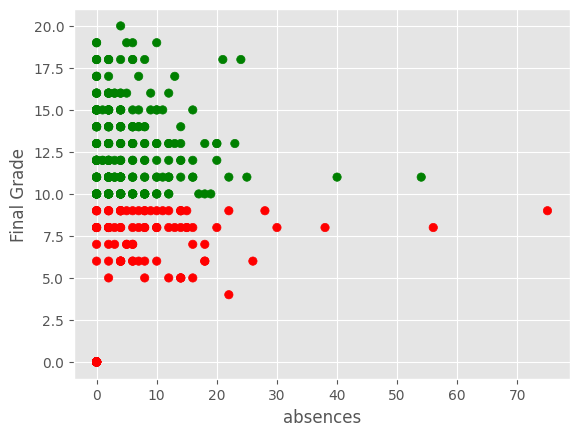

In [15]:
# Define the plot column
plot = "absences"

# Use ggplot style for the plot
style.use("ggplot")

# Define colors based on the final grade (G3)
# Green for good grades, Red for bad grades
colors = ['green' if grade >= 10 else 'red' for grade in data["G3"]]

# Create the scatter plot
plt.scatter(data[plot], data["G3"], c=colors)

# Label the axes
plt.xlabel(plot)
plt.ylabel("Final Grade")

# Display the plot
plt.show()


The last step is to plot the diagram. Above is the Absences vs. Final Grade diagram. It suggests a correlation between a student’s absences and a student’s final grade. You are highly encouraged to plot different diagrams by changing the “plot” part in the code in order to discover the correlation between different attributes in the data set.

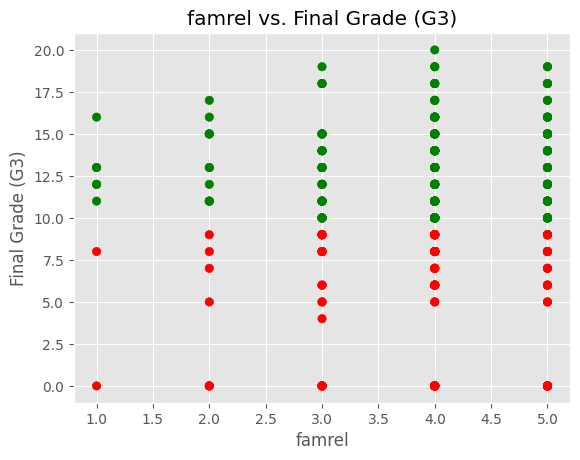

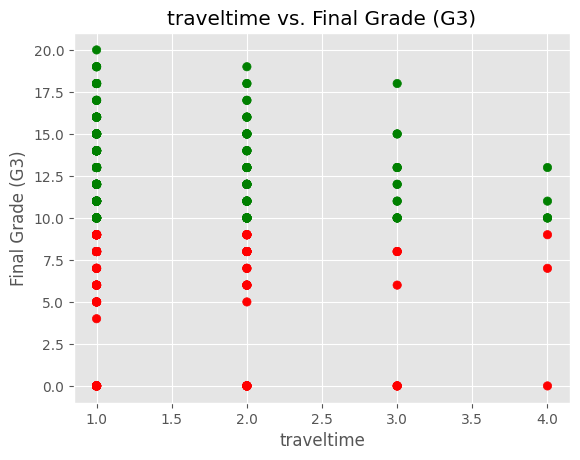

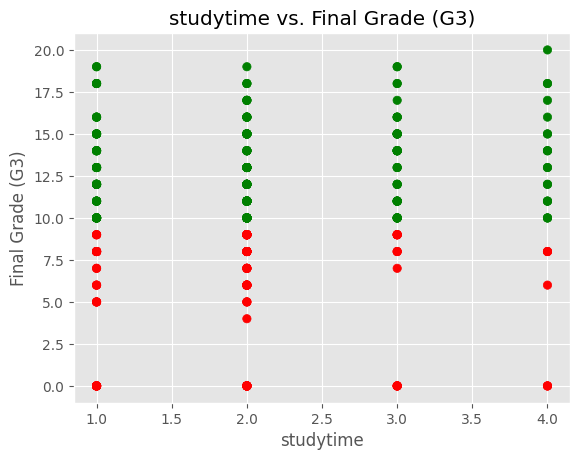

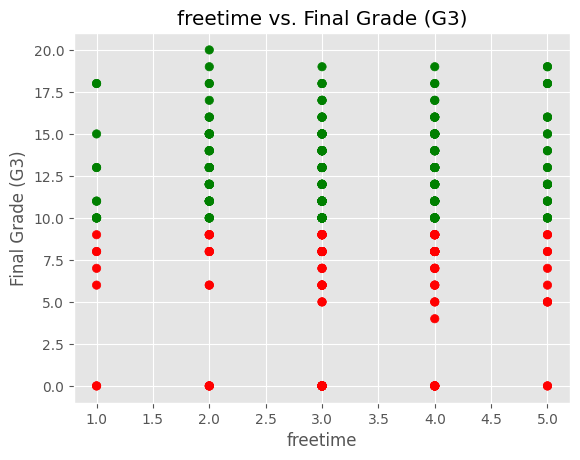

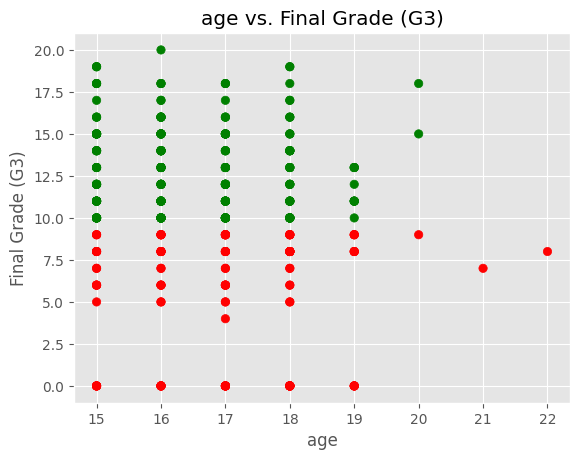

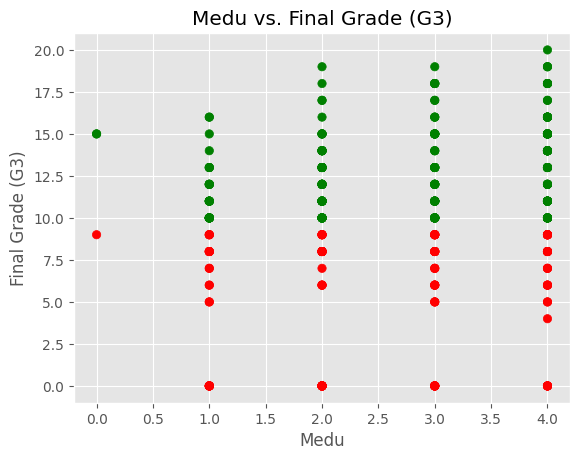

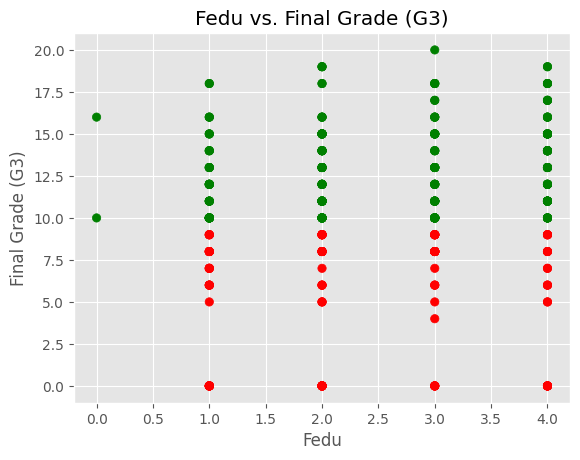

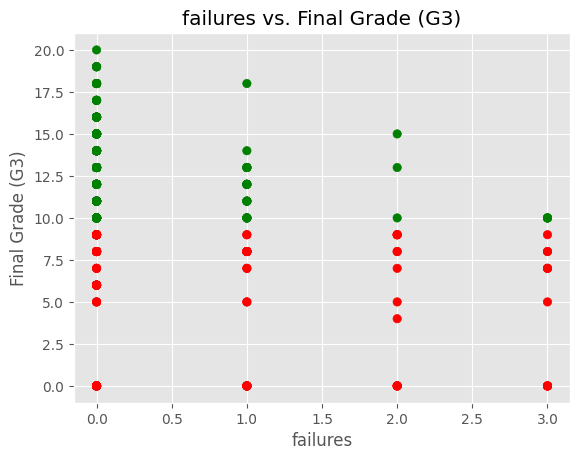

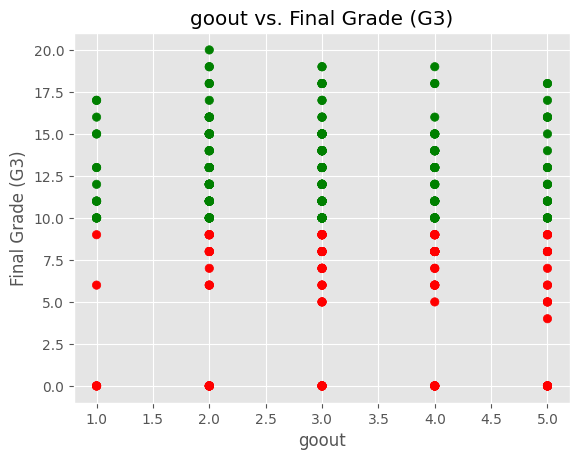

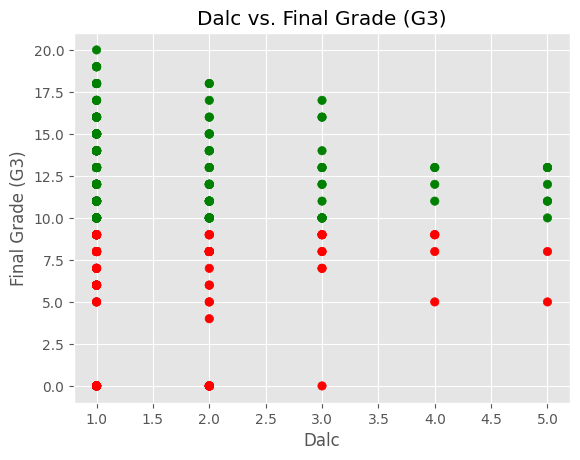

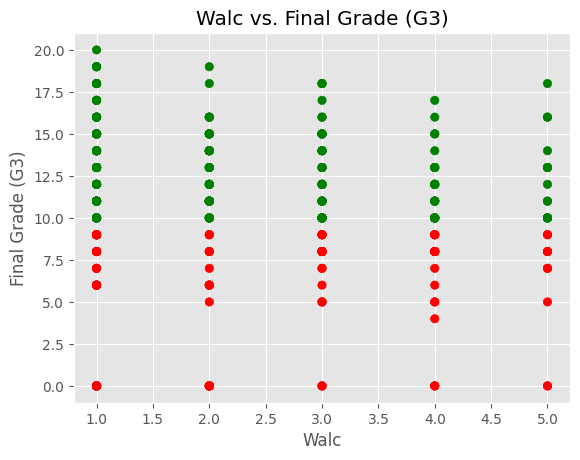

In [16]:
# List of columns you can explore as predictors
plot_columns = ["famrel", "traveltime", "studytime", "freetime", "age",
                "Medu", "Fedu", "failures", "goout", "Dalc", "Walc"]

# Loop through each column and plot the relationship with the final grade (G3)
for plot in plot_columns:
    # Set colors based on whether the final grade is good (>= 10) or bad (< 10)
    colors = ['green' if grade >= 10 else 'red' for grade in data["G3"]]

    # Use ggplot style for the plot
    style.use("ggplot")

    # Create scatter plot
    plt.scatter(data[plot], data["G3"], c=colors)

    # Label the axes
    plt.xlabel(plot)
    plt.ylabel("Final Grade (G3)")

    # Set the title of the plot
    plt.title(f"{plot} vs. Final Grade (G3)")

    # Show the plot
    plt.show()
